<a href="https://colab.research.google.com/github/lynnlyn620/nyu-python-public-policy/blob/master/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 1. First you will need to prep your data to get the count of complaints categorized as Noise - Residential, HEAT/HOT WATER, and everything else. You can update the code from lecture that gets the total count of 311 requests per CD to instead get the count of 311 requests per CD that meet the criteria for the 3 categories. You should create three separate dataframes, one per category:

1. complaint_type = 'Noise - Residential'
2. complaint_type = 'HEAT/HOT WATER'
3. Everything else: (complaint_type != 'Noise - Residential') & (complaint_type != 'HEAT/HOT WATER')

In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [5]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
# this function will recode the community_board value into borocd in a new column

def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

# we can apply the function to each of our dataframes. this is the beauty of functions; you can reuse them on multiple objects!

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [8]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [9]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [10]:
27353 == 20316 + 3346 + 3691

True

Step 2. Create a stacked bar chart of 311 requests per community district. Each community district bar should be comprised of three stacked bars, one for each category listed below. The total height of each community district bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per community district.

1. number of 'Noise - Residential' complaints per community district
2. number of 'HEAT/HOT WATER' complaints per community district
3. number of other complaints per community district

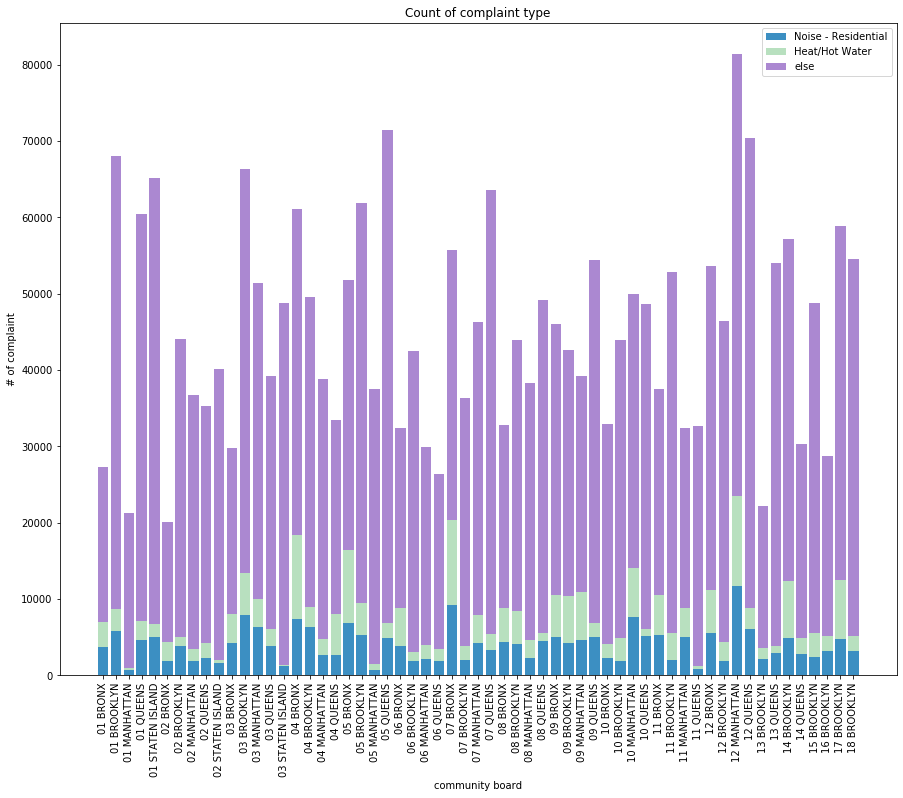

In [11]:
position_on_x = np.arange(len(count_noise))
counts = np.array(count_noise.count_of_311_requests)
counts_hot= np.array(count_heatwater.count_of_311_requests)
counts_else= np.array(count_other.count_of_311_requests)
plt.figure(figsize=(15, 12))
plot1 = plt.bar(
  position_on_x,
  counts,
  align='center',
  color='#3c8fc2',
  label='Noise - Residential'
)
plot2 = plt.bar(
  position_on_x,
  counts_hot,
  bottom=counts, 
  align='center',
  color='#b8e0bf',
  label='Heat/Hot Water'
)
plot3 = plt.bar(
  position_on_x,
  counts_else,
  bottom=counts + counts_hot, 
  align='center',
  color='#ab88d1',
  label='else'
)
plt.xticks(position_on_x, count_noise.community_board, rotation=90)

plt.title('Count of complaint type')
plt.xlabel('community board')
plt.ylabel('# of complaint')
plt.legend() # defaults to putting legend in top right

plt.show()

Step 3. Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts (y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.

In [13]:
count_noise['borocd'] and count_noise.count_of_311_requests

ValueError: ignored

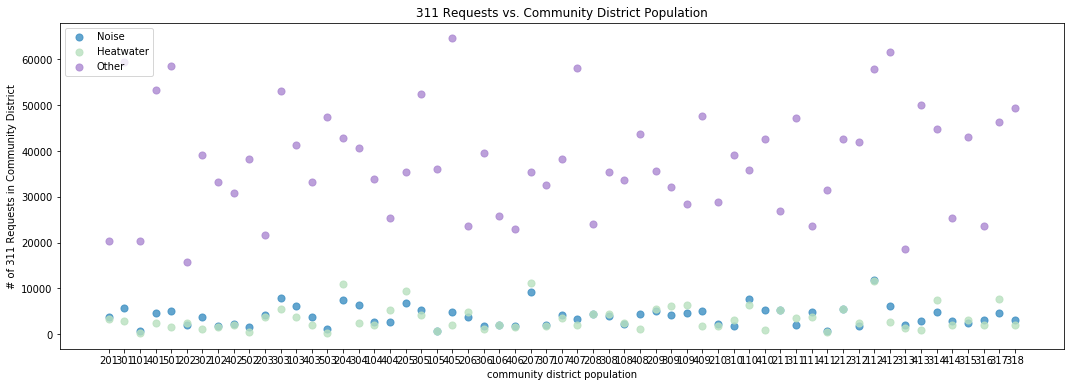

In [18]:
Noise = (count_noise['borocd'], count_noise.count_of_311_requests)
Heatwater = (count_heatwater['borocd'], count_heatwater.count_of_311_requests)
Other = (count_other['borocd'], count_other.count_of_311_requests)
colors = ["#3c8fc2", "#b8e0bf","#ab88d1"]
groups = ["Noise", "Heatwater", "Other"]
plt.figure(figsize=(18,6))
plt.scatter(
  Noise[0],
  Noise[1],
  alpha=0.8,
  c=colors[0],
  s=50,
  label=groups[0]
)
plt.scatter(
  Heatwater[0],
  Heatwater[1],
  alpha=0.8,
  c=colors[1],
  s=50,
  label=groups[1]
)
plt.scatter(
  Other[0],
  Other[1],
  alpha=0.8,
  c=colors[2],
  s=50,
  label=groups[2]
)

plt.title('311 Requests vs. Community District Population')
plt.xlabel('community district population')
plt.ylabel('# of 311 Requests in Community District')
plt.legend(loc=2)

plt.show()